In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Import your custom modules
import config
import data_generation
import benchmarks
import evaluation # We need this for the metric calculation functions

In [57]:
print("--- Poisson MLE-based ITS Benchmark Test ---")

# --- 1. Select Scenario and Generate Data ---
scenario_to_test_id = "S06" # A good choice with K=2 interventions and a linear trend
test_seed = 42 # A fixed seed for reproducibility

try:
    scenario_config = next(s for s in config.SCENARIOS if s['id'] == scenario_to_test_id)
except StopIteration:
    print(f"Error: Scenario '{scenario_to_test_id}' not found in config.py")
    
print(f"Generating data for scenario: {scenario_to_test_id}...")
sim_data = data_generation.simulate_scenario_data(scenario_config, run_seed=test_seed)
print("Data generated successfully.")

--- Poisson MLE-based ITS Benchmark Test ---
Generating data for scenario: S06...
Data generated successfully.


In [58]:
# # --- 2. Run the ITS Benchmark Function ---
# print("\nRunning calculate_its_with_poisson_mle function...")
# its_results = benchmarks.calculate_its_with_poisson_mle(
#     d_t=sim_data["d_t"],
#     c_t=sim_data["c_t"],
#     f_s=sim_data["f_s_true"],
#     Bm=sim_data["Bm_true"],
#     intervention_times_abs=sim_data["true_intervention_times_0_abs"],
#     intervention_signs=sim_data["beta_signs_true"]
# )
# print("ITS model fitting complete.")

In [59]:
# its_results

In [60]:
# from benchmarks import *
# d_t=sim_data["d_t"]
# c_t=sim_data["c_t"]
# f_s=sim_data["f_s_true"]
# Bm=sim_data["Bm_true"]
# intervention_times_abs=sim_data["true_intervention_times_0_abs"]
# intervention_signs=sim_data["beta_signs_true"]
# alpha=0.05
# n_mc_ci=500

In [61]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# class ITSModel(nn.Module):
#     """A PyTorch module defining the structure of the non-linear ITS model."""
#     def __init__(self, K_spline, K_interventions):
#         super(ITSModel, self).__init__()
#         self.alphas = nn.Parameter(torch.zeros(K_spline, dtype=torch.float64))
#         if K_interventions > 0:
#             self.gammas = nn.Parameter(torch.zeros(K_interventions, dtype=torch.float64))
#             self.lambdas = nn.Parameter(torch.full((K_interventions,), 0.1, dtype=torch.float64))

#     def forward(self, Bm, Z_its, intervention_signs):
#         """Calculates the predicted logit(CFR) based on current parameter values."""
#         baseline_trend = Bm @ self.alphas
#         if Z_its.shape[1] > 0:
#             betas = torch.exp(self.gammas) * intervention_signs
#             intervention_effect = torch.sum((1 - torch.exp(-self.lambdas.unsqueeze(0) * Z_its)) * betas.unsqueeze(0), axis=1)
#             return baseline_trend + intervention_effect
#         else:
#             return baseline_trend

In [62]:
# T, K_spline = Bm.shape
# K_interventions = len(intervention_times_abs)
# num_params = K_spline + 2 * K_interventions

# # Prepare data as PyTorch tensors with double precision for stability
# d_t_tensor = torch.tensor(d_t, dtype=torch.float64)
# Q_matrix = torch.tensor(construct_Q_matrix(c_t, f_s, T), dtype=torch.float64)
# Bm_tensor = torch.tensor(Bm, dtype=torch.float64)
# Z_its_tensor = torch.zeros((T, K_interventions), dtype=torch.float64)
# t_array = np.arange(T)
# for k in range(K_interventions):
#     Z_its_tensor[:, k] = torch.tensor(np.maximum(0, t_array - intervention_times_abs[k]), dtype=torch.float64)
# intervention_signs_tensor = torch.tensor(intervention_signs, dtype=torch.float64)

# model = ITSModel(K_spline, K_interventions)
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # --- Optimization Loop ---
# for epoch in range(3000): # More iterations for convergence
#     optimizer.zero_grad()
#     logit_pred = model(Bm_tensor, Z_its_tensor, intervention_signs_tensor)
#     mu_pred = torch.maximum(Q_matrix @ torch.sigmoid(logit_pred), torch.tensor(1e-9, dtype=torch.float64))
    
#     loss = -torch.sum(d_t_tensor * torch.log(mu_pred) - mu_pred)
#     if torch.isnan(loss) or torch.isinf(loss):
#         break
#     loss.backward()
#     optimizer.step()

# # --- Extract Optimized Parameters and Covariance ---
# popt = np.concatenate([p.detach().cpu().numpy() for p in model.parameters()])
# pcov = np.full((num_params, num_params), np.nan)
# perr = np.full_like(popt, np.nan)

# try:
#     # Define a function that takes a flat tensor of parameters for Hessian calculation
#     def loss_func_flat(params_flat):
#         model.alphas.data = params_flat[:K_spline]
#         if K_interventions > 0:
#             model.gammas.data = params_flat[K_spline:-K_interventions]
#             model.lambdas.data = params_flat[-K_interventions:]
        
#         logit_pred_hess = model(Bm_tensor, Z_its_tensor, intervention_signs_tensor)
#         mu_pred_hess = torch.maximum(Q_matrix @ torch.sigmoid(logit_pred_hess), torch.tensor(1e-9, dtype=torch.float64))
#         return -torch.sum(d_t_tensor * torch.log(mu_pred_hess) - mu_pred_hess)

#     hessian = torch.autograd.functional.hessian(loss_func_flat, torch.tensor(popt, dtype=torch.float64))
#     pcov = np.linalg.pinv(hessian.numpy()) # Use pseudo-inverse for stability
#     perr = np.sqrt(np.diag(pcov))
# except (RuntimeError, np.linalg.LinAlgError):
#     print("Warning: Hessian calculation failed for ITS benchmark. CIs will be NaN.")

In [63]:
# z_crit = norm.ppf(1 - alpha / 2)

# gammas_est = popt[K_spline : K_spline + K_interventions]
# lambdas_est = popt[K_spline + K_interventions:]
# gammas_se, lambdas_se = perr[K_spline : K_spline + K_interventions], perr[K_spline + K_interventions:]

# # --- Calculate Prediction CIs via Monte Carlo ---
# pred_factual_mc = np.full((n_mc_ci, T), np.nan)
# pred_counterfactual_mc = np.full((n_mc_ci, T), np.nan)

# if not np.any(np.isnan(pcov)):
#     try:
#         param_samples = np.random.multivariate_normal(popt, pcov, size=n_mc_ci)
#         for i in range(n_mc_ci):
#             p_sample = param_samples[i, :]
#             alphas_s, gammas_s, lambdas_s = p_sample[:K_spline], p_sample[K_spline:K_spline+K_interventions], p_sample[K_spline+K_interventions:]
            
#             betas_s = np.exp(gammas_s) * intervention_signs
#             intervention_effect_s = np.sum((1 - np.exp(-lambdas_s * Z_its)) * betas_s, axis=1)
#             baseline_trend_s = Bm @ alphas_s
            
#             pred_factual_mc[i, :] = sigmoid(baseline_trend_s + intervention_effect_s)
#             pred_counterfactual_mc[i, :] = sigmoid(baseline_trend_s)
#     except (np.linalg.LinAlgError, ValueError):
#         print(f"Warning: NLS Covariance matrix was not valid for CI sampling.")

# # --- Final Point Estimates ---
# alphas_hat, gammas_hat, lambdas_hat = popt[:K_spline], popt[K_spline:K_spline+K_interventions], popt[K_spline+K_interventions:]
# betas_hat = np.exp(gammas_hat) * intervention_signs

# factual_mean = sigmoid(Bm @ alphas_hat + np.sum((1 - np.exp(-lambdas_hat * Z_its)) * betas_hat, axis=1))
# counterfactual_mean = sigmoid(Bm @ alphas_hat)

# its_results = {
#     "its_factual_mean": factual_mean,
#     "its_factual_lower": np.percentile(pred_factual_mc, (alpha/2)*100, axis=0),
#     "its_factual_upper": np.percentile(pred_factual_mc, (1-alpha/2)*100, axis=0),
#     "its_counterfactual_mean": counterfactual_mean,
#     "its_counterfactual_lower": np.percentile(pred_counterfactual_mc, (alpha/2)*100, axis=0),
#     "its_counterfactual_upper": np.percentile(pred_counterfactual_mc, (1-alpha/2)*100, axis=0),
#     "its_gamma_est": gammas_hat,
#     "its_gamma_lower": gammas_hat - z_crit * gammas_se,
#     "its_gamma_upper": gammas_hat + z_crit * gammas_se,
#     "its_lambda_est": lambdas_hat,
#     "its_lambda_lower": lambdas_hat - z_crit * lambdas_se,
#     "its_lambda_upper": lambdas_hat + z_crit * lambdas_se,
# }
# its_results

# # # --- Final Point Estimates and Return Dictionary ---
# # alphas_hat = popt[:K_spline]
# # gammas_hat = popt[K_spline:K_spline+K_interventions] if K_interventions > 0 else np.array([])
# # # ... (rest of the logic to assemble the final results dictionary) ...

In [64]:
# T, K_spline = Bm.shape
# K_interventions = len(intervention_times_abs)
# num_params = K_spline + 2 * K_interventions

# Q_matrix = construct_Q_matrix(c_t, f_s, T)
# Z_its = np.zeros((T, K_interventions))
# t_array = np.arange(T)
# for k in range(K_interventions):
#     Z_its[:, k] = np.maximum(0, t_array - intervention_times_abs[k])

# def negative_log_likelihood(params, Bm, Z, d_t, Q, signs):
#     """The objective function to minimize (Poisson Negative Log-Likelihood)."""
#     alphas, gammas, lambdas = params[:K_spline], params[K_spline:-K_interventions], params[-K_interventions:]
    
#     betas = np.exp(gammas) * signs
#     intervention_effect = np.sum((1 - np.exp(-lambdas * Z)) * betas, axis=1)
#     baseline_trend = Bm @ alphas
    
#     r_t_pred = sigmoid(baseline_trend + intervention_effect)
#     mu_pred = np.maximum(Q @ r_t_pred, 1e-9)
    
#     log_likelihood = np.sum(d_t * np.log(mu_pred) - mu_pred)
#     return -log_likelihood

# # Initial guesses
# p0 = np.zeros(num_params)
# if K_interventions > 0: p0[K_spline + K_interventions:] = 0.1

# # --- FIX APPLIED HERE: Define bounds for the parameters ---
# # Alphas and Gammas are unconstrained: (None, None)
# # Lambdas are constrained to be non-negative: (0, None)
# bounds = [(None, None)] * (K_spline + K_interventions) + \
#          [(0, None)] * K_interventions

# # --- Fit the model using scipy.optimize.minimize with bounds ---
# result = minimize(
#     negative_log_likelihood, 
#     x0=p0, 
#     args=(Bm, Z_its, d_t, Q_matrix, intervention_signs), 
#     method='L-BFGS-B', # This method supports box constraints
#     bounds=bounds
# )

# popt = result.x #if result.success else np.full(num_params, np.nan)
# # The inverse Hessian from L-BFGS-B is an approximation
# pcov = result.hess_inv.todense() if hasattr(result, 'hess_inv') else np.full((num_params, num_params), np.nan)

In [65]:
# penalty_strength = 1

# T, K_spline = Bm.shape
# K_interventions = len(intervention_times_abs)
# num_params = K_spline + 2 * K_interventions

# Q_matrix = construct_Q_matrix(c_t, f_s, T)
# Z_its = np.zeros((T, K_interventions))
# t_array = np.arange(T)
# for k in range(K_interventions):
#     Z_its[:, k] = np.maximum(0, t_array - intervention_times_abs[k])

# # --- Define the PENALIZED objective function ---
# def penalized_negative_log_likelihood(params, Bm, Z, d_t, Q, signs, penalty):
#     alphas, gammas, lambdas = params[:K_spline], params[K_spline:-K_interventions], params[-K_interventions:]
    
#     # Calculate negative log-likelihood (as before)
#     betas = np.exp(gammas) * signs
#     intervention_effect = np.sum((1 - np.exp(-lambdas * Z)) * betas, axis=1)
#     r_t_pred = sigmoid(Bm @ alphas + intervention_effect)
#     mu_pred = np.maximum(Q @ r_t_pred, 1e-9)
#     nll = -np.sum(d_t * np.log(mu_pred) - mu_pred)
    
#     # ** FIX APPLIED HERE: Add the L2 penalty term **
#     # We penalize all parameters to prevent any from becoming excessively large.
#     l2_penalty = penalty * np.sum(params**2)
    
#     return nll + l2_penalty

# # Initial guesses and bounds
# p0 = np.zeros(num_params)
# if K_interventions > 0: p0[K_spline + K_interventions:] = 0.1
# bounds = [(None, None)] * (K_spline + K_interventions) + [(1e-6, None)] * K_interventions

# # --- Fit the model using scipy.optimize.minimize with the penalized objective ---
# result = minimize(
#     penalized_negative_log_likelihood, 
#     x0=p0, 
#     args=(Bm, Z_its, d_t, Q_matrix, intervention_signs, penalty_strength), 
#     method='L-BFGS-B',
#     bounds=bounds
# )

# popt = result.x if result.success else np.full(num_params, np.nan)
# pcov = result.hess_inv.todense() if hasattr(result, 'hess_inv') else np.full((num_params, num_params), np.nan)

In [66]:
# # --- Calculate Parameter CIs ---
# perr = np.sqrt(np.diag(pcov)) if not np.any(np.isnan(pcov)) else np.full_like(popt, np.nan)
# z_crit = norm.ppf(1 - alpha / 2)
# gammas_est, lambdas_est = popt[K_spline:-K_interventions], popt[-K_interventions:]
# gammas_se, lambdas_se = perr[K_spline:-K_interventions], perr[-K_interventions:]

# # --- Calculate Prediction CIs via Monte Carlo ---
# pred_factual_mc, cf_mc = np.full((n_mc_ci, T), np.nan), np.full((n_mc_ci, T), np.nan)
# if not np.any(np.isnan(pcov)):
#     try:
#         param_samples = np.random.multivariate_normal(popt, pcov, size=n_mc_ci)
#         for i, p_sample in enumerate(param_samples):
#             alphas_s, gammas_s, lambdas_s = p_sample[:K_spline], p_sample[K_spline:-K_interventions], p_sample[-K_interventions:]
            
#             # Ensure sampled lambdas respect the non-negativity constraint
#             lambdas_s = np.maximum(0, lambdas_s)
            
#             betas_s = np.exp(gammas_s) * intervention_signs
#             baseline_s = Bm @ alphas_s
#             intervention_s = np.sum((1 - np.exp(-lambdas_s * Z_its)) * betas_s, axis=1)
            
#             pred_factual_mc[i, :] = sigmoid(baseline_s + intervention_s)
#             pred_counterfactual_mc[i, :] = sigmoid(baseline_s)
#     except (np.linalg.LinAlgError, ValueError):
#         print("Warning: NLS Covariance matrix was not valid for CI sampling.")

# # --- Final Point Estimates and Return Dictionary ---
# alphas_hat, gammas_hat, lambdas_hat = popt[:K_spline], popt[K_spline:-K_interventions], popt[-K_interventions:]
# betas_hat = np.exp(gammas_hat) * intervention_signs

# its_results = {
#     "its_factual_mean": sigmoid(Bm @ alphas_hat + np.sum((1 - np.exp(-lambdas_hat * Z_its)) * betas_hat, axis=1)),
#     "its_factual_lower": np.percentile(pred_factual_mc, (alpha/2)*100, axis=0),
#     "its_factual_upper": np.percentile(pred_factual_mc, (1-alpha/2)*100, axis=0),
#     "its_counterfactual_mean": sigmoid(Bm @ alphas_hat),
#     "its_counterfactual_lower": np.percentile(cf_mc, (alpha/2)*100, axis=0),
#     "its_counterfactual_upper": np.percentile(cf_mc, (1-alpha/2)*100, axis=0),
#     "its_gamma_est": gammas_hat,
#     "its_gamma_lower": gammas_hat - z_crit * gammas_se,
#     "its_gamma_upper": gammas_hat + z_crit * gammas_se,
#     "its_lambda_est": lambdas_hat,
#     "its_lambda_lower": lambdas_hat - z_crit * lambdas_se,
#     "its_lambda_upper": lambdas_hat + z_crit * lambdas_se,
# }
# its_results

In [67]:
# penalty_samples = 10**np.linspace(-2,2,5)

In [68]:
# from scipy.optimize import minimize
# from sklearn.model_selection import TimeSeriesSplit
# from joblib import Parallel, delayed
# from tqdm.auto import tqdm

# n_bootstraps = 100
# n_cv_iter = 15

# T, K_spline = Bm.shape
# K_interventions = len(intervention_times_abs)
# num_params = K_spline + 2 * K_interventions

# Q_matrix = construct_Q_matrix(c_t, f_s, T)
# Z_its = np.zeros((T, K_interventions))
# t_array = np.arange(T)
# for k in range(K_interventions):
#     Z_its[:, k] = np.maximum(0, t_array - intervention_times_abs[k])

# def objective_func(params, Bm, Z, d_t, Q, signs, p_alpha, p_gamma_lambda):
#     """The penalized negative Poisson log-likelihood objective function."""
#     alphas, gammas, lambdas = params[:K_spline], params[K_spline:-K_interventions], params[-K_interventions:]
#     nll = -np.sum(d_t * np.log(np.maximum(1e-9, Q @ sigmoid(Bm @ alphas + np.sum((1 - np.exp(-lambdas * Z)) * (np.exp(gammas) * signs), axis=1)))) - (Q @ sigmoid(Bm @ alphas + np.sum((1 - np.exp(-lambdas * Z)) * (np.exp(gammas) * signs), axis=1))))
#     penalty1 = p_alpha * np.sum(np.diff(alphas, n=2)**2)
#     penalty2 = p_gamma_lambda * (np.sum(gammas**2) + np.sum(lambdas**2))
#     return nll + penalty1 + penalty2

# # --- Step 1: Tune penalty strength using Time-Series CV ---
# tscv = TimeSeriesSplit(n_splits=5)

# # Sample from a log-uniform distribution for penalty strengths
# rng_cv = np.random.default_rng()
# penalty_samples = 10**rng_cv.uniform(-2, 2, size=(n_cv_iter, 2))

# cv_scores = []
# for p_alpha, p_gamma_lambda in penalty_samples:
#     fold_scores = []
#     for train_idx, test_idx in tscv.split(t_array):
#         p0 = np.zeros(num_params)
#         if K_interventions > 0: p0[K_spline + K_interventions:] = 0.1
#         bounds = [(None, None)] * (K_spline + K_interventions) + [(1e-6, None)] * K_interventions
        
#         res_cv = minimize(objective_func, x0=p0, 
#                           args=(Bm[train_idx], Z_its[train_idx], d_t[train_idx], Q_matrix[np.ix_(train_idx, train_idx)], intervention_signs, p_alpha, p_gamma_lambda),
#                           method='L-BFGS-B', bounds=bounds)
#         if res_cv.success:
#             score = objective_func(res_cv.x, Bm[test_idx], Z_its[test_idx], d_t[test_idx], Q_matrix[np.ix_(test_idx, test_idx)], intervention_signs, 0, 0)
#             fold_scores.append(score)
#     cv_scores.append(np.mean(fold_scores) if fold_scores else np.inf)

# best_penalty_alpha, best_penalty_gamma_lambda = penalty_samples[np.nanargmin(cv_scores)]

# # --- Step 2: Fit final model on all data with the best penalty ---
# final_result = minimize(
#     objective_func, x0=p0, 
#     args=(Bm, Z_its, d_t, Q_matrix, intervention_signs, best_penalty_alpha, best_penalty_gamma_lambda), 
#     method='L-BFGS-B', bounds=bounds
# )
# popt = final_result.x #if final_result.success else np.full(num_params, np.nan)

In [69]:
# # --- Step 3: Calculate CIs using Parallelized Moving Block Bootstrap ---
# block_length = 30

# def bootstrap_iteration(seed):
#     rng_boot = np.random.default_rng(seed)
#     num_blocks_to_sample = int(np.ceil(T / block_length))
#     block_starts = rng_boot.choice(np.arange(T - block_length + 1), size=num_blocks_to_sample, replace=True)
#     boot_indices = np.concatenate([np.arange(start, start + block_length) for start in block_starts])[:T]
    
#     d_t_boot, c_t_boot, Bm_boot, Z_its_boot = d_t[boot_indices], c_t[boot_indices], Bm[boot_indices], Z_its[boot_indices]
#     Q_boot = construct_Q_matrix(c_t_boot, f_s, T)
    
#     boot_res = minimize(objective_func, x0=popt, 
#                         args=(Bm_boot, Z_its_boot, d_t_boot, Q_boot, intervention_signs, best_penalty_alpha, best_penalty_gamma_lambda),
#                         method='L-BFGS-B', bounds=bounds)
#     return boot_res.x if boot_res.success else np.full(num_params, np.nan)

# boot_seeds = np.random.randint(0, 1e6, size=n_bootstraps)
# boot_params = Parallel(n_jobs=-1)(delayed(bootstrap_iteration)(seed) for seed in boot_seeds)
# boot_params = np.array(boot_params)

# # --- Calculate estimates and CIs ---
# param_ci_lower = np.nanpercentile(boot_params, (alpha/2)*100, axis=0)
# param_ci_upper = np.nanpercentile(boot_params, (1-alpha/2)*100, axis=0)

In [70]:
# # Calculate Prediction CIs via Monte Carlo from the bootstrap parameter distribution
# pred_factual_mc = np.full((n_bootstraps, T), np.nan)
# pred_counterfactual_mc = np.full((n_bootstraps, T), np.nan)

# for i, p_sample in enumerate(boot_params):
#     if np.any(np.isnan(p_sample)): continue
#     alphas_s, gammas_s, lambdas_s = p_sample[:K_spline], p_sample[K_spline:-K_interventions], p_sample[-K_interventions:]
#     betas_s = np.exp(gammas_s) * intervention_signs
#     intervention_effect_s = np.sum((1 - np.exp(-lambdas_s * Z_its)) * betas_s, axis=1)
#     baseline_trend_s = Bm @ alphas_s
    
#     pred_factual_mc[i, :] = sigmoid(baseline_trend_s + intervention_effect_s)
#     pred_counterfactual_mc[i, :] = sigmoid(baseline_trend_s)

# factual_ci_lower = np.nanpercentile(pred_factual_mc, (alpha/2)*100, axis=0)
# factual_ci_upper = np.nanpercentile(pred_factual_mc, (1-alpha/2)*100, axis=0)
# cf_ci_lower = np.nanpercentile(pred_counterfactual_mc, (alpha/2)*100, axis=0)
# cf_ci_upper = np.nanpercentile(pred_counterfactual_mc, (1-alpha/2)*100, axis=0)

# # --- Final Point Estimates from the original fit ---
# alphas_hat, gammas_hat, lambdas_hat = popt[:K_spline], popt[K_spline:-K_interventions], popt[-K_interventions:]
# betas_hat = np.exp(gammas_hat) * intervention_signs

# its_results = {
#     "its_factual_mean": sigmoid(Bm @ alphas_hat + np.sum((1 - np.exp(-lambdas_hat * Z_its)) * betas_hat, axis=1)),
#     "its_factual_lower": factual_ci_lower,
#     "its_factual_upper": factual_ci_upper,
#     "its_counterfactual_mean": sigmoid(Bm @ alphas_hat),
#     "its_counterfactual_lower": cf_ci_lower,
#     "its_counterfactual_upper": cf_ci_upper,
#     "its_gamma_est": gammas_hat,
#     "its_gamma_lower": param_ci_lower[K_spline:-K_interventions],
#     "its_gamma_upper": param_ci_upper[K_spline:-K_interventions],
#     "its_lambda_est": lambdas_hat,
#     "its_lambda_lower": param_ci_lower[-K_interventions:],
#     "its_lambda_upper": param_ci_upper[-K_interventions:],
# }

In [71]:
# from scipy.optimize import minimize
# from sklearn.model_selection import TimeSeriesSplit
# from joblib import Parallel, delayed
# from tqdm.auto import tqdm

# n_bootstraps = 200
# n_cv_iter = 20

# T, K_spline = Bm.shape
# K_interventions = len(intervention_times_abs)
# num_params = K_spline + 2 * K_interventions

# Q_matrix = construct_Q_matrix(c_t, f_s, T)
# Z_its = np.zeros((T, K_interventions))
# t_array = np.arange(T)
# for k in range(K_interventions):
#     Z_its[:, k] = np.maximum(0, t_array - intervention_times_abs[k])

# def objective_func(params, Bm, Z, d_t_data, Q, signs, p_alpha, p_gamma_lambda):
#     """The penalized negative Poisson log-likelihood objective function."""
#     alphas, gammas, lambdas = params[:K_spline], params[K_spline:-K_interventions], params[-K_interventions:]
    
#     betas = np.exp(gammas) * signs
#     intervention_effect = np.sum((1 - np.exp(-lambdas * Z)) * betas, axis=1)
#     r_t_pred = sigmoid(Bm @ alphas + intervention_effect)
#     mu_pred = np.maximum(Q @ r_t_pred, 1e-9)
#     nll = -np.sum(d_t_data * np.log(mu_pred) - mu_pred)
    
#     penalty1 = p_alpha * np.sum(np.diff(alphas, n=2)**2)
#     penalty2 = p_gamma_lambda * (np.sum(gammas**2) + np.sum(lambdas**2))
#     return nll + penalty1 + penalty2

# # --- Step 1: Fit final model on all original data to get point estimates (popt) ---
# tscv = TimeSeriesSplit(n_splits=5)

# # Sample from a log-uniform distribution for penalty strengths
# rng_cv = np.random.default_rng()
# penalty_samples = 10**rng_cv.uniform(-2, 2, size=(n_cv_iter, 2))

# cv_scores = []
# for p_alpha, p_gamma_lambda in penalty_samples:
#     fold_scores = []
#     for train_idx, test_idx in tscv.split(t_array):
#         p0 = np.zeros(num_params)
#         if K_interventions > 0: p0[K_spline + K_interventions:] = 0.1
#         bounds = [(None, None)] * (K_spline + K_interventions) + [(1e-6, None)] * K_interventions
        
#         res_cv = minimize(objective_func, x0=p0, 
#                           args=(Bm[train_idx], Z_its[train_idx], d_t[train_idx], Q_matrix[np.ix_(train_idx, train_idx)], intervention_signs, p_alpha, p_gamma_lambda),
#                           method='L-BFGS-B', bounds=bounds)
#         if res_cv.success:
#             score = objective_func(res_cv.x, Bm[test_idx], Z_its[test_idx], d_t[test_idx], Q_matrix[np.ix_(test_idx, test_idx)], intervention_signs, 0, 0)
#             fold_scores.append(score)
#     cv_scores.append(np.mean(fold_scores) if fold_scores else np.inf)

# best_penalty_alpha, best_penalty_gamma_lambda = penalty_samples[np.nanargmin(cv_scores)]

# p0 = np.zeros(num_params)
# if K_interventions > 0: p0[K_spline + K_interventions:] = 0.1
# bounds = [(None, None)] * (K_spline + K_interventions) + [(1e-6, None)] * K_interventions

# final_result = minimize(
#     objective_func, x0=p0, 
#     args=(Bm, Z_its, d_t, Q_matrix, intervention_signs, best_penalty_alpha, best_penalty_gamma_lambda), 
#     method='L-BFGS-B', bounds=bounds
# )
# popt = final_result.x if final_result.success else np.full(num_params, np.nan)

# # --- Step 2: Parametric Bootstrap for Confidence Intervals ---
# # Get the predicted mean deaths from the final model
# alphas_hat, gammas_hat, lambdas_hat = popt[:K_spline], popt[K_spline:-K_interventions], popt[-K_interventions:]
# betas_hat = np.exp(gammas_hat) * intervention_signs
# intervention_effect_hat = np.sum((1 - np.exp(-lambdas_hat * Z_its)) * betas_hat, axis=1)
# r_t_hat = sigmoid(Bm @ alphas_hat + intervention_effect_hat)
# mu_hat = np.maximum(Q_matrix @ r_t_hat, 1e-9)

# def bootstrap_iteration(seed):
#     rng_boot = np.random.default_rng(seed)
#     # ** KEY CHANGE: Generate new death data from the fitted Poisson model **
#     d_t_boot = rng_boot.poisson(mu_hat)
    
#     # Re-fit model on the bootstrapped death data
#     boot_res = minimize(
#         objective_func, x0=popt, # Use final estimate as starting point
#         args=(Bm, Z_its, d_t_boot, Q_matrix, intervention_signs, best_penalty_alpha, best_penalty_gamma_lambda),
#         method='L-BFGS-B', bounds=bounds
#     )
#     return boot_res.x if boot_res.success else np.full(num_params, np.nan)

# boot_seeds = np.random.randint(0, 1e6, size=n_bootstraps)
# boot_params = Parallel(n_jobs=-1, prefer="threads")(delayed(bootstrap_iteration)(seed) for seed in boot_seeds)
# boot_params = np.array(boot_params)

In [72]:
# param_ci_lower = np.nanpercentile(boot_params, (alpha/2)*100, axis=0)
# param_ci_upper = np.nanpercentile(boot_params, (1-alpha/2)*100, axis=0)

# # Calculate Prediction CIs via Monte Carlo from the bootstrap parameter distribution
# pred_factual_mc = np.full((n_bootstraps, T), np.nan)
# pred_counterfactual_mc = np.full((n_bootstraps, T), np.nan)

# for i, p_sample in enumerate(boot_params):
#     if np.any(np.isnan(p_sample)): continue
#     alphas_s, gammas_s, lambdas_s = p_sample[:K_spline], p_sample[K_spline:-K_interventions], p_sample[-K_interventions:]
#     betas_s = np.exp(gammas_s) * intervention_signs
#     intervention_effect_s = np.sum((1 - np.exp(-lambdas_s * Z_its)) * betas_s, axis=1)
#     baseline_trend_s = Bm @ alphas_s
    
#     pred_factual_mc[i, :] = sigmoid(baseline_trend_s + intervention_effect_s)
#     pred_counterfactual_mc[i, :] = sigmoid(baseline_trend_s)

# factual_ci_lower = np.nanpercentile(pred_factual_mc, (alpha/2)*100, axis=0)
# factual_ci_upper = np.nanpercentile(pred_factual_mc, (1-alpha/2)*100, axis=0)
# cf_ci_lower = np.nanpercentile(pred_counterfactual_mc, (alpha/2)*100, axis=0)
# cf_ci_upper = np.nanpercentile(pred_counterfactual_mc, (1-alpha/2)*100, axis=0)

# # --- Final Point Estimates from the original fit ---
# alphas_hat, gammas_hat, lambdas_hat = popt[:K_spline], popt[K_spline:-K_interventions], popt[-K_interventions:]
# betas_hat = np.exp(gammas_hat) * intervention_signs

# its_results = {
#     "its_factual_mean": sigmoid(Bm @ alphas_hat + np.sum((1 - np.exp(-lambdas_hat * Z_its)) * betas_hat, axis=1)),
#     "its_factual_lower": factual_ci_lower,
#     "its_factual_upper": factual_ci_upper,
#     "its_counterfactual_mean": sigmoid(Bm @ alphas_hat),
#     "its_counterfactual_lower": cf_ci_lower,
#     "its_counterfactual_upper": cf_ci_upper,
#     "its_gamma_est": gammas_hat,
#     "its_gamma_lower": param_ci_lower[K_spline:-K_interventions],
#     "its_gamma_upper": param_ci_upper[K_spline:-K_interventions],
#     "its_lambda_est": lambdas_hat,
#     "its_lambda_lower": param_ci_lower[-K_interventions:],
#     "its_lambda_upper": param_ci_upper[-K_interventions:],
# }

In [73]:
# d_t=sim_data["d_t"]
# c_t=sim_data["c_t"]
# f_s=sim_data["f_s_true"]
# Bm=sim_data["Bm_true"]
# intervention_times_abs=sim_data["true_intervention_times_0_abs"]
# intervention_signs=sim_data["beta_signs_true"]

# T, K_spline = Bm.shape
# K_interventions = len(intervention_times_abs)
# num_params = K_spline + 2 * K_interventions

# Q_matrix = construct_Q_matrix(c_t, f_s, T)
# Z_its = np.zeros((T, K_interventions))
# t_array = np.arange(T)
# for k in range(K_interventions):
#     Z_its[:, k] = np.maximum(0, t_array - intervention_times_abs[k])

# def objective_func(params, Bm, Z, d_t_data, Q, signs, p_alpha):
#     """The penalized negative Poisson log-likelihood objective function."""
#     alphas, gammas, lambdas = params[:K_spline], params[K_spline:-K_interventions], params[-K_interventions:]
#     betas = np.exp(gammas) * signs
#     intervention_effect = np.sum((1 - np.exp(-lambdas * Z)) * betas, axis=1)
#     r_t_pred = sigmoid(Bm @ alphas + intervention_effect)
#     mu_pred = np.maximum(Q @ r_t_pred, 1e-9)
#     nll = -np.sum(d_t_data * np.log(mu_pred) - mu_pred)
    
#     penalty = p_alpha * np.sum(np.abs(np.diff(alphas, n=2)))
#     return nll + penalty

# # --- Step 1: Fit final model on all original data to get point estimates (popt) ---
# penalty_grid = 10**np.linspace(-2,2,11)
# tscv = TimeSeriesSplit(n_splits=3)
# cv_scores = {}

# p0 = np.zeros(num_params)
# if K_interventions > 0: p0[K_spline + K_interventions:] = 0.1
# bounds = [(None, None)] * (K_spline + K_interventions) + [(1e-6, None)] * K_interventions

# for p_alpha in penalty_grid:
#     fold_scores = []
#     for train_idx, test_idx in tscv.split(t_array):
#         res_cv = minimize(objective_func, x0=p0, 
#                           args=(Bm[train_idx], Z_its[train_idx], d_t[train_idx], Q_matrix[np.ix_(train_idx, train_idx)], intervention_signs, p_alpha),
#                           method='L-BFGS-B', bounds=bounds)
#         if res_cv.success:
#             score = objective_func(res_cv.x, Bm[test_idx], Z_its[test_idx], d_t[test_idx], Q_matrix[np.ix_(test_idx, test_idx)], intervention_signs, 0)
#             fold_scores.append(score)
#     cv_scores[p_alpha] = np.mean(fold_scores) if fold_scores else np.inf

# best_penalty_alpha = min(cv_scores, key=cv_scores.get)

# final_result = minimize(
#     objective_func, x0=p0, 
#     args=(Bm, Z_its, d_t, Q_matrix, intervention_signs, best_penalty_alpha), 
#     method='L-BFGS-B', bounds=bounds
# )
# popt = final_result.x if final_result.success else np.full(num_params, np.nan)

In [81]:
from benchmarks import *
import itertools

def calculate_its_with_parametric_bootstrap(d_t, c_t, f_s, Bm, 
                                            intervention_times_abs, intervention_signs, 
                                            alpha=0.05):
    """
    Estimates CFR and parameters using an ITS model with a Poisson likelihood (MLE).

    Args:
        d_t, c_t, f_s (np.ndarray): Daily deaths, cases, and delay distribution.
        Bm (np.ndarray): The B-spline basis matrix for the baseline trend.
        intervention_times_abs (np.ndarray): Absolute day numbers for intervention starts.
        intervention_signs (np.ndarray): The signs of the intervention effects.
        alpha (float): Significance level for the CIs (e.g., 0.05 for 95% CI).
        n_cv_iter (int): Number of iterations for randomized search CV.
        n_bootstraps (int): Number of bootstrapping samples for generating prediction CIs.

    Returns:
        dict: A comprehensive dictionary of all point estimates and CI bounds.
    """

    T, K_spline = Bm.shape
    K_interventions = len(intervention_times_abs)
    num_params = K_spline + 2 * K_interventions
    
    Q_matrix = construct_Q_matrix(c_t, f_s, T)
    Z_its = np.zeros((T, K_interventions))
    t_array = np.arange(T)
    for k in range(K_interventions):
        Z_its[:, k] = np.maximum(0, t_array - intervention_times_abs[k])
    
    def objective_func(params, Bm, Z, d_t_data, Q, signs, p_alpha, p_gamma):
        """The penalized negative Poisson log-likelihood objective function."""
        alphas, gammas, lambdas = params[:K_spline], params[K_spline:-K_interventions], params[-K_interventions:]
        betas = np.exp(gammas) * signs
        intervention_effect = np.sum((1 - np.exp(-lambdas * Z)) * betas, axis=1)
        r_t_pred = sigmoid(Bm @ alphas + intervention_effect)
        mu_pred = np.maximum(Q @ r_t_pred, 1e-9)
        nll = -np.sum(d_t_data * np.log(mu_pred) - mu_pred)
        
        penalty1 = p_alpha * np.sum(np.diff(alphas, n=2)**2)
        penalty2 = p_gamma * np.sum(gammas**2)
        
        return nll + penalty1 + penalty2
    
    # --- Step 1: Fit final model on all original data to get point estimates (popt) ---
    penalty_grid = config.PENALTY_GRID
    tscv = TimeSeriesSplit(n_splits=3)
    cv_scores = {}
    
    p0 = np.zeros(num_params)
    if K_interventions > 0: p0[K_spline + K_interventions:] = 0.1
    bounds = [(None, None)] * (K_spline + K_interventions) + [(1e-6, None)] * K_interventions

    for p_alpha, p_gamma in itertools.product(penalty_grid,penalty_grid):
        fold_scores = []
        for train_idx, test_idx in tscv.split(t_array):
            res_cv = minimize(objective_func, x0=p0, 
                              args=(Bm[train_idx], Z_its[train_idx], d_t[train_idx], Q_matrix[np.ix_(train_idx, train_idx)], intervention_signs, p_alpha, p_gamma),
                              method='L-BFGS-B', bounds=bounds)
            if res_cv.success:
                score = objective_func(res_cv.x, Bm[test_idx], Z_its[test_idx], d_t[test_idx], Q_matrix[np.ix_(test_idx, test_idx)], intervention_signs, 0, 0)
                fold_scores.append(score)
        cv_scores[(p_alpha,p_gamma)] = np.mean(fold_scores) if fold_scores else np.inf
    
    best_penalties = min(cv_scores, key=cv_scores.get)
    best_penalty_alpha, best_penalty_gamma = best_penalties
    
    final_result = minimize(
        objective_func, x0=p0, 
        args=(Bm, Z_its, d_t, Q_matrix, intervention_signs, best_penalty_alpha, best_penalty_gamma), 
        method='L-BFGS-B', bounds=bounds
    )
    popt = final_result.x if final_result.success else np.full(num_params, np.nan)
    
    # --- Step 2: Parametric Bootstrap for Confidence Intervals ---
    alphas_hat, gammas_hat, lambdas_hat = popt[:K_spline], popt[K_spline:-K_interventions], popt[-K_interventions:]
    betas_hat = np.exp(gammas_hat) * intervention_signs
    r_t_hat = sigmoid(Bm @ alphas_hat + np.sum((1 - np.exp(-lambdas_hat * Z_its)) * betas_hat, axis=1))
    mu_hat = np.maximum(Q_matrix @ r_t_hat, 1e-9)
    
    def bootstrap_iteration(seed):
        rng_boot = np.random.default_rng(seed)
        d_t_boot = rng_boot.poisson(mu_hat)
        boot_res = minimize(
            objective_func, x0=popt, 
            args=(Bm, Z_its, d_t_boot, Q_matrix, intervention_signs, best_penalty_alpha, best_penalty_gamma),
            method='L-BFGS-B', bounds=bounds)
        return boot_res.x if boot_res.success else np.full(num_params, np.nan)
    
    boot_seeds = np.random.randint(0, 1e6, size=config.N_BOOTSTRAPS_ITS)
    boot_params = Parallel(n_jobs=-1)(delayed(bootstrap_iteration)(seed) for seed in boot_seeds)
    boot_params = np.array(boot_params)

    # --- Step 3: Calculate Prediction CIs via Monte Carlo from the bootstrap parameter distribution ---
    param_ci_lower = np.nanpercentile(boot_params, (alpha/2)*100, axis=0)
    param_ci_upper = np.nanpercentile(boot_params, (1-alpha/2)*100, axis=0)
    
    pred_factual_mc = np.full((config.N_BOOTSTRAPS_ITS, T), np.nan)
    pred_counterfactual_mc = np.full((config.N_BOOTSTRAPS_ITS, T), np.nan)
    
    for i, p_sample in enumerate(boot_params):
        if np.any(np.isnan(p_sample)): continue
        alphas_s, gammas_s, lambdas_s = p_sample[:K_spline], p_sample[K_spline:-K_interventions], p_sample[-K_interventions:]
        betas_s = np.exp(gammas_s) * intervention_signs
        intervention_effect_s = np.sum((1 - np.exp(-lambdas_s * Z_its)) * betas_s, axis=1)
        baseline_trend_s = Bm @ alphas_s
        
        pred_factual_mc[i, :] = sigmoid(baseline_trend_s + intervention_effect_s)
        pred_counterfactual_mc[i, :] = sigmoid(baseline_trend_s)

    factual_ci_lower = np.nanpercentile(pred_factual_mc, (alpha/2)*100, axis=0)
    factual_ci_upper = np.nanpercentile(pred_factual_mc, (1-alpha/2)*100, axis=0)
    cf_ci_lower = np.nanpercentile(pred_counterfactual_mc, (alpha/2)*100, axis=0)
    cf_ci_upper = np.nanpercentile(pred_counterfactual_mc, (1-alpha/2)*100, axis=0)
    
    its_results = {
        "its_factual_mean": sigmoid(Bm @ alphas_hat + np.sum((1 - np.exp(-lambdas_hat * Z_its)) * betas_hat, axis=1)),
        "its_factual_lower": factual_ci_lower,
        "its_factual_upper": factual_ci_upper,
        "its_counterfactual_mean": sigmoid(Bm @ alphas_hat),
        "its_counterfactual_lower": cf_ci_lower,
        "its_counterfactual_upper": cf_ci_upper,
        "its_gamma_est": gammas_hat,
        "its_gamma_lower": param_ci_lower[K_spline:-K_interventions],
        "its_gamma_upper": param_ci_upper[K_spline:-K_interventions],
        "its_lambda_est": lambdas_hat,
        "its_lambda_lower": param_ci_lower[-K_interventions:],
        "its_lambda_upper": param_ci_upper[-K_interventions:],
    }

    return its_results

In [82]:
its_results = calculate_its_with_parametric_bootstrap(
    d_t=sim_data["d_t"],
    c_t=sim_data["c_t"],
    f_s=sim_data["f_s_true"],
    Bm=sim_data["Bm_true"],
    intervention_times_abs=sim_data["true_intervention_times_0_abs"],
    intervention_signs=sim_data["beta_signs_true"]
)

In [83]:
# --- 3. Numerical Evaluation ---
print("\n--- Numerical Evaluation Results (ITS Benchmark) ---")
T_analyze = config.T_ANALYSIS_LENGTH
true_r_0_t_analysis = sim_data["true_r_0_t"][:T_analyze]
true_rcf_0_t_analysis = sim_data["true_rcf_0_t"][:T_analyze]

# Curve fitting metrics
mae_rt_its = evaluation.calculate_mae_rt(true_r_0_t_analysis, its_results["its_factual_mean"][:T_analyze])
mciw_rt_its = evaluation.calculate_mciw_rt(its_results["its_factual_lower"][:T_analyze], its_results["its_factual_upper"][:T_analyze])
mcic_rt_its = evaluation.calculate_mcic_rt(true_r_0_t_analysis, its_results["its_factual_lower"][:T_analyze], its_results["its_factual_upper"][:T_analyze])

mae_rcf_its = evaluation.calculate_mae_rt(true_rcf_0_t_analysis, its_results["its_counterfactual_mean"][:T_analyze])
mciw_rcf_its = evaluation.calculate_mciw_rt(its_results["its_counterfactual_lower"][:T_analyze], its_results["its_counterfactual_upper"][:T_analyze])
mcic_rcf_its = evaluation.calculate_mcic_rt(true_rcf_0_t_analysis, its_results["its_counterfactual_lower"][:T_analyze], its_results["its_counterfactual_upper"][:T_analyze])

print("\n--- Curve Fit Metrics ---")
print(f"  Factual r_t MAE:      {mae_rt_its:.4f}")
print(f"  Factual r_t MCIW:     {mciw_rt_its:.4f}")
print(f"  Factual r_t MCIC:     {mcic_rt_its:.4f}")
print(f"  Counterfactual r_t MAE: {mae_rcf_its:.4f}")
print(f"  Counterfactual r_t MCIW:{mciw_rcf_its:.4f}")
print(f"  Counterfactual r_t MCIC:{mcic_rcf_its:.4f}")

# Parameter estimation metrics
num_interventions = sim_data["num_interventions_true_K"]
if num_interventions > 0:
    true_gammas = np.log(sim_data["true_beta_abs_0"] + 1e-9)
    true_lambdas = sim_data["true_lambda_0"]

    print("\n--- Gamma (log(beta_abs)) Parameter Metrics ---")
    for k in range(num_interventions):
        bias = evaluation.calculate_param_bias(true_gammas[k], its_results['its_gamma_est'][k])
        width = evaluation.calculate_param_cri_width(its_results['its_gamma_lower'][k], its_results['its_gamma_upper'][k])
        coverage = evaluation.calculate_param_cri_coverage(true_gammas[k], its_results['its_gamma_lower'][k], its_results['its_gamma_upper'][k])
        print(f"  gamma_{k+1}:")
        print(f"    True Value:     {true_gammas[k]:.4f}")
        print(f"    Estimated:      {its_results['its_gamma_est'][k]:.4f}")
        print(f"    Bias:           {bias:.4f}")
        print(f"    CI Width:       {width:.4f}")
        print(f"    Coverage:       {coverage}")
        
    print("\n--- Lambda Parameter Metrics ---")
    for k in range(num_interventions):
        bias = evaluation.calculate_param_bias(true_lambdas[k], its_results['its_lambda_est'][k])
        width = evaluation.calculate_param_cri_width(its_results['its_lambda_lower'][k], its_results['its_lambda_upper'][k])
        coverage = evaluation.calculate_param_cri_coverage(true_lambdas[k], its_results['its_lambda_lower'][k], its_results['its_lambda_upper'][k])
        print(f"  lambda_{k+1}:")
        print(f"    True Value:     {true_lambdas[k]:.4f}")
        print(f"    Estimated:      {its_results['its_lambda_est'][k]:.4f}")
        print(f"    Bias:           {bias:.4f}")
        print(f"    CI Width:       {width:.4f}")
        print(f"    Coverage:       {coverage}")


--- Numerical Evaluation Results (ITS Benchmark) ---

--- Curve Fit Metrics ---
  Factual r_t MAE:      0.0012
  Factual r_t MCIW:     0.0011
  Factual r_t MCIC:     0.3200
  Counterfactual r_t MAE: 0.0029
  Counterfactual r_t MCIW:0.0017
  Counterfactual r_t MCIC:0.1800

--- Gamma (log(beta_abs)) Parameter Metrics ---
  gamma_1:
    True Value:     1.6094
    Estimated:      -3.0063
    Bias:           -4.6158
    CI Width:       2.3236
    Coverage:       False
  gamma_2:
    True Value:     1.0986
    Estimated:      -5.7665
    Bias:           -6.8651
    CI Width:       0.1359
    Coverage:       False

--- Lambda Parameter Metrics ---
  lambda_1:
    True Value:     0.3000
    Estimated:      1.7731
    Bias:           1.4731
    CI Width:       0.0543
    Coverage:       False
  lambda_2:
    True Value:     0.3000
    Estimated:      0.8259
    Bias:           0.5259
    CI Width:       0.0089
    Coverage:       False



Generating plot...

Plot saved to: ./simulation_outputs/plots/test_poisson_its_output.pdf


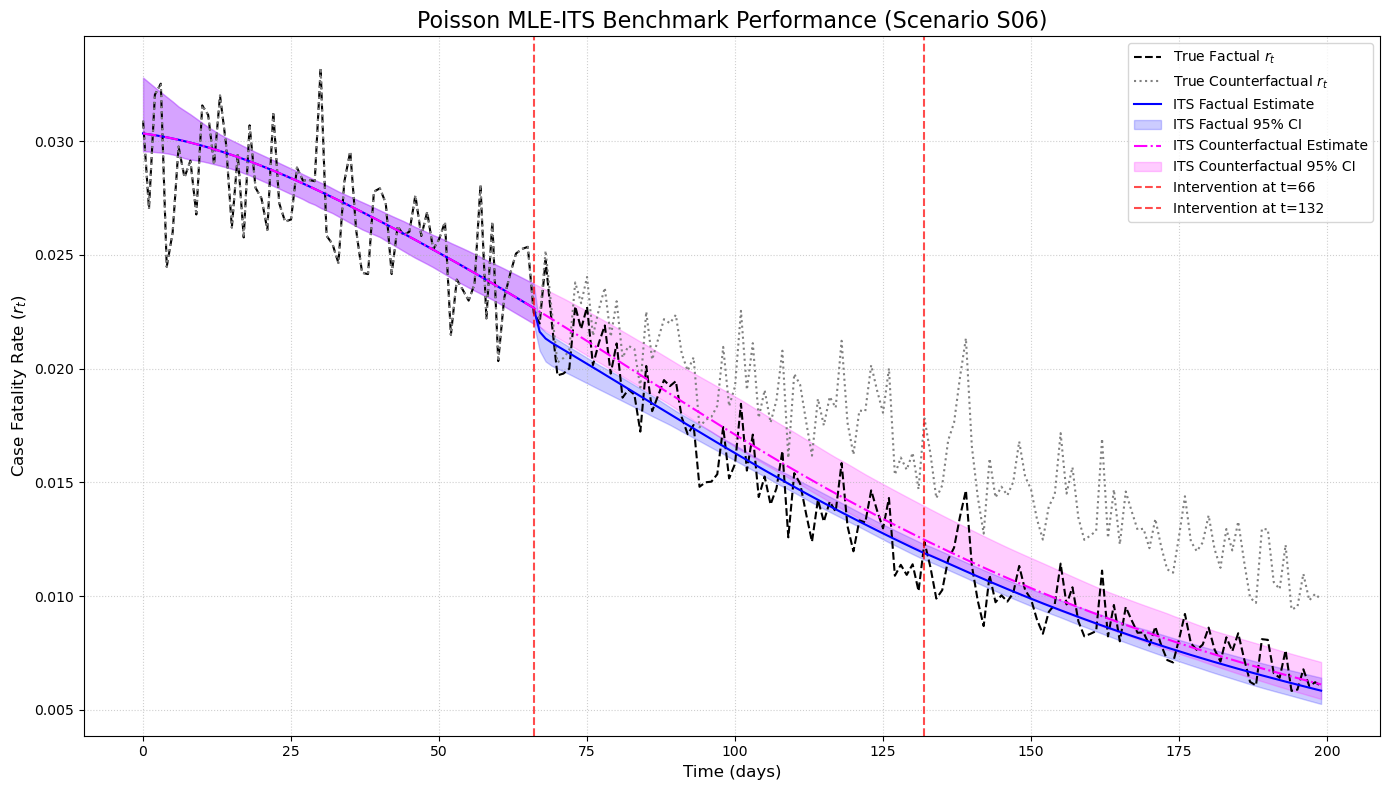

In [84]:
# --- 4. Visual Evaluation ---
print("\nGenerating plot...")
time_points = np.arange(T_analyze)

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(time_points, true_r_0_t_analysis, color='black', linestyle='--', label="True Factual $r_t$")
ax.plot(time_points, true_rcf_0_t_analysis, color='gray', linestyle=':', label="True Counterfactual $r_t$")

ax.plot(time_points, its_results["its_factual_mean"][:T_analyze], color='blue', label="ITS Factual Estimate")
ax.fill_between(time_points, its_results["its_factual_lower"][:T_analyze], its_results["its_factual_upper"][:T_analyze], 
                color='blue', alpha=0.2, label="ITS Factual 95% CI")

ax.plot(time_points, its_results["its_counterfactual_mean"][:T_analyze], color='magenta', linestyle='-.', label="ITS Counterfactual Estimate")
ax.fill_between(time_points, its_results["its_counterfactual_lower"][:T_analyze], its_results["its_counterfactual_upper"][:T_analyze], 
                color='magenta', alpha=0.2, label="ITS Counterfactual 95% CI")

for t_int in sim_data["true_intervention_times_0_abs"]:
    if t_int < T_analyze:
        ax.axvline(x=t_int, color='r', linestyle='--', alpha=0.7, label=f"Intervention at t={int(t_int)}")

ax.set_title(f"Poisson MLE-ITS Benchmark Performance (Scenario {scenario_to_test_id})", fontsize=16)
ax.set_xlabel("Time (days)", fontsize=12)
ax.set_ylabel("Case Fatality Rate ($r_t$)", fontsize=12)
ax.legend(loc='best')
ax.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

output_dir = config.OUTPUT_DIR_PLOTS
os.makedirs(output_dir, exist_ok=True)
plot_filename = os.path.join(output_dir, "test_poisson_its_output.pdf")
plt.savefig(plot_filename)
print(f"\nPlot saved to: {plot_filename}")

plt.show()